<a href="https://colab.research.google.com/github/hinda-mt/hinda-mt/blob/main/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective
In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.

Instructions 🔍

**a brief description about our data**

this is the source of our dataset  : https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.


---
We use 24 + class = 25 ( 11 numeric ,14 nominal)

1.Age(numerical)
age in years ♒             
2.Blood Pressure(numerical)
bp in mm/Hg ♒

3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025) ⚾

4.Albumin(nominal)
al - (0,1,2,3,4,5) ⚾

5.Sugar(nominal)
su - (0,1,2,3,4,5) ⚾

6.Red Blood Cells(nominal)
rbc - (normal,abnormal)

7.Pus Cell (nominal)
pc - (normal,abnormal)

8.Pus Cell clumps(nominal)
pcc - (present,notpresent)






 9.Bacteria(nominal)
ba - (present,notpresent)

10.Blood Glucose Random(numerical)
bgr in mgs/dl ♒

11.Blood Urea(numerical)
bu in mgs/dl ♒

12.Serum Creatinine(numerical)
sc in mgs/dl ♒

13.Sodium(numerical)
sod in mEq/L ♒

14.Potassium(numerical)
pot in mEq/L ♒

15.Hemoglobin(numerical)
hemo in gms ♒

16.Packed Cell Volume(numerical) ♒

17.White Blood Cell Count(numerical)
wc in cells/cumm ♒

18.Red Blood Cell Count(numerical)
rc in millions/cmm ♒

19.Hypertension(nominal)
htn - (yes,no)

20.Diabetes Mellitus(nominal)
dm - (yes,no)

21.Coronary Artery Disease(nominal)
cad - (yes,no)

22.Appetite(nominal)
appet - (good,poor)

23.Pedal Edema(nominal)
pe - (yes,no)

24.Anemia(nominal)
ane - (yes,no)

25.Class (nominal)
class - (ckd,notckd)


**Load the dataset of kidney disease.**

#Data Preparation for Machine Learning



In [ ]:
# Importing packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats # Needed to compute statistics for categorical data

kidney_data=pd.read_csv('kidney_disease.csv')

kidney_data




,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


#Inspecting

In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


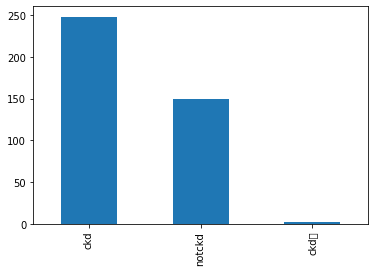

In [ ]:
kidney_data['classification'].value_counts().plot(kind='bar')

In [ ]:
for i in kidney_data.columns:
    print('{} has unique values {}'.format(i,kidney_data[i].unique()),'\n')

id has unique values [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 2

#CORRECTION

In [ ]:
#Replace incorrect values
kidney_data['dm'] = kidney_data['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
kidney_data['cad'] = kidney_data['cad'].replace(to_replace = '\tno', value='no')
kidney_data['classification'] = kidney_data['classification'].replace(to_replace = 'ckd\t', value = 'ckd')
kidney_data['pcv'] = kidney_data['pcv'].replace(to_replace = {'\t?': np.nan ,'\t43': 43 })
kidney_data['wc'] = kidney_data['wc'].replace(to_replace = {'\t6200': 6200 ,'\t8400': 8400,'\t?': np.nan})
kidney_data['rc'] = kidney_data['rc'].replace(to_replace = {'\t?':np.nan })



In [ ]:
kidney_data['rc'] = pd.to_numeric(kidney_data['rc'], errors='coerce')
kidney_data['wc'] = pd.to_numeric(kidney_data['wc'], errors='coerce')
kidney_data['pcv'] = pd.to_numeric(kidney_data['pcv'], errors='coerce')
kidney_data[['rc','wc','pcv']].dtypes

rc     float64
wc     float64
pcv    float64
dtype: object

In [ ]:
kidney_data.drop(["id"],axis=1,inplace=True) 

In [ ]:
kidney_data['rbc'] = kidney_data.rbc.replace(['normal','abnormal'], ['1', '0'])
kidney_data['pc'] = kidney_data.pc.replace(['normal','abnormal'], ['1', '0'])
kidney_data['pcc'] = kidney_data.pcc.replace(['present','notpresent'], ['1', '0'])
kidney_data['ba'] = kidney_data.ba.replace(['present','notpresent'], ['1', '0'])
kidney_data['htn'] = kidney_data.htn.replace(['yes','no'], ['1', '0'])
kidney_data['dm'] = kidney_data.dm.replace(['yes','no'], ['1', '0'])
kidney_data['cad'] = kidney_data.cad.replace(['yes','no'], ['1', '0'])
kidney_data['appet'] = kidney_data.appet.replace(['good','poor'], ['1', '0'])
kidney_data['pe'] = kidney_data.pe.replace(['yes','no'], ['1', '0'])
kidney_data['ane'] = kidney_data.ane.replace(['yes','no'], ['1', '0'])
kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,1,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0,0,1,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1,0,0,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,1,0,0,ckd


In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in kidney_data.columns if kidney_data[col].dtype == 'object']
num_cols = [col for col in kidney_data.columns if kidney_data[col].dtype != 'object']

#visualizing the target

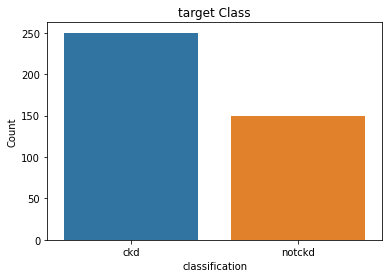

In [ ]:
sns.countplot(x='classification',data=kidney_data)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

In [ ]:
print('Percent of chronic kidney disease sample: ',round(len(kidney_data[kidney_data['classification']=='ckd'])/len(kidney_data['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(kidney_data[kidney_data['classification']=='notckd'])/len(kidney_data['classification'])*100,2),"%")

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

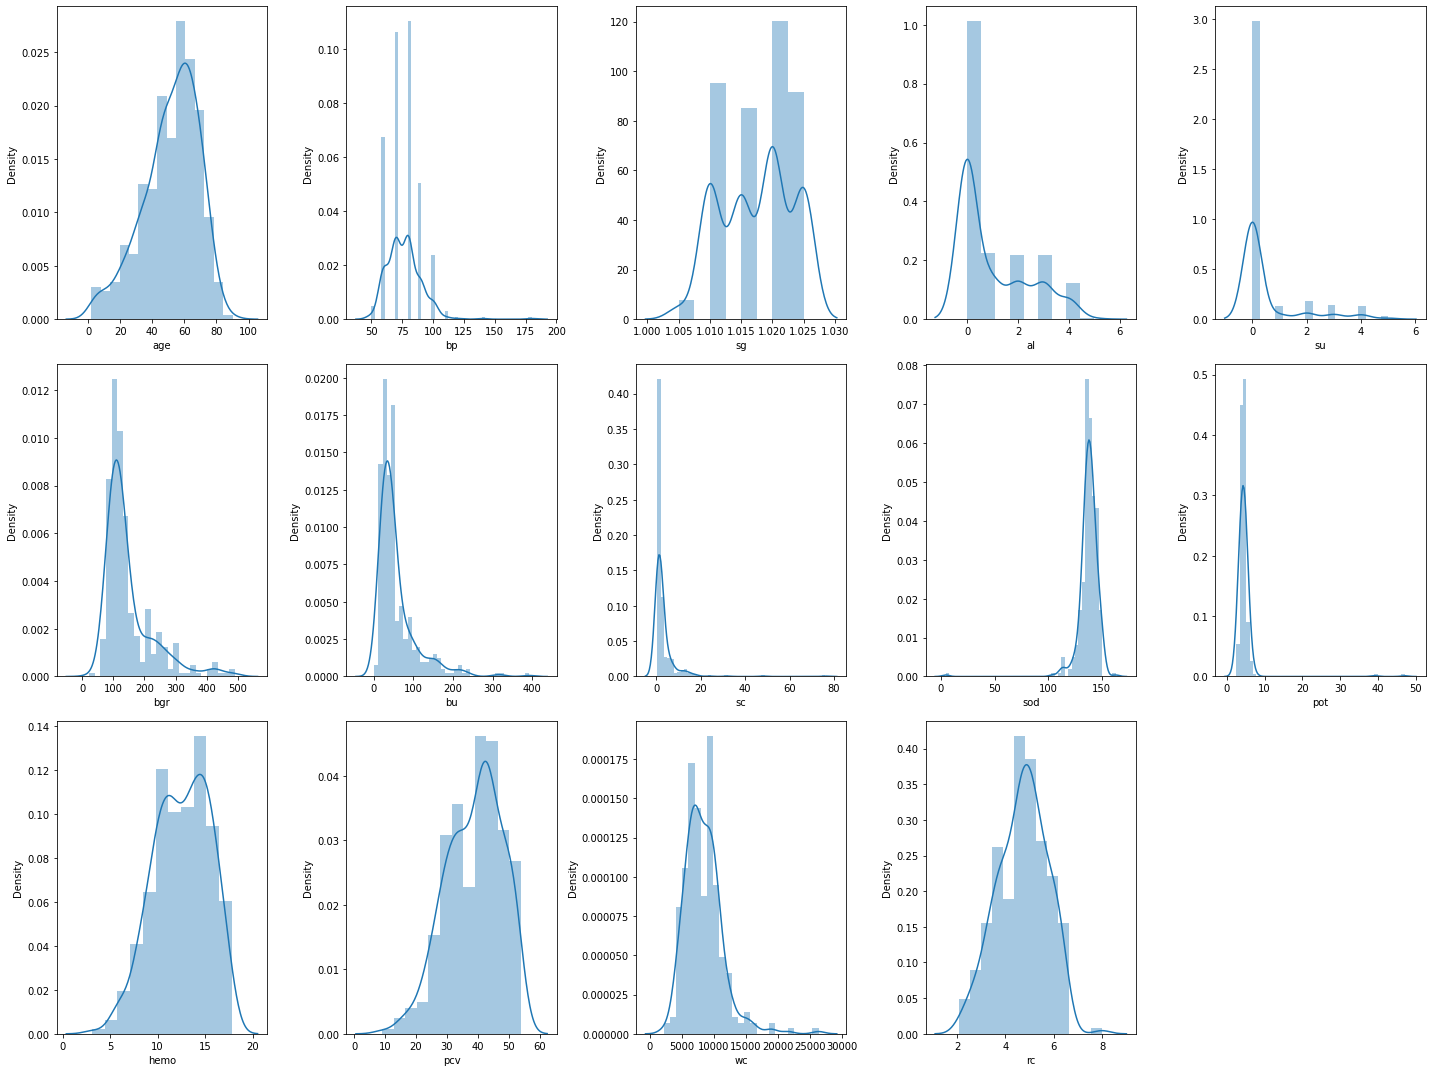

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Observations:
age looks a bit left skewed 
Blood gluscose random is right skewed
Blood Urea is also a bit right skewed
Rest of the features are lightly skewed.
I will be standardizing them in pre processing notebook to see their distributions then.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

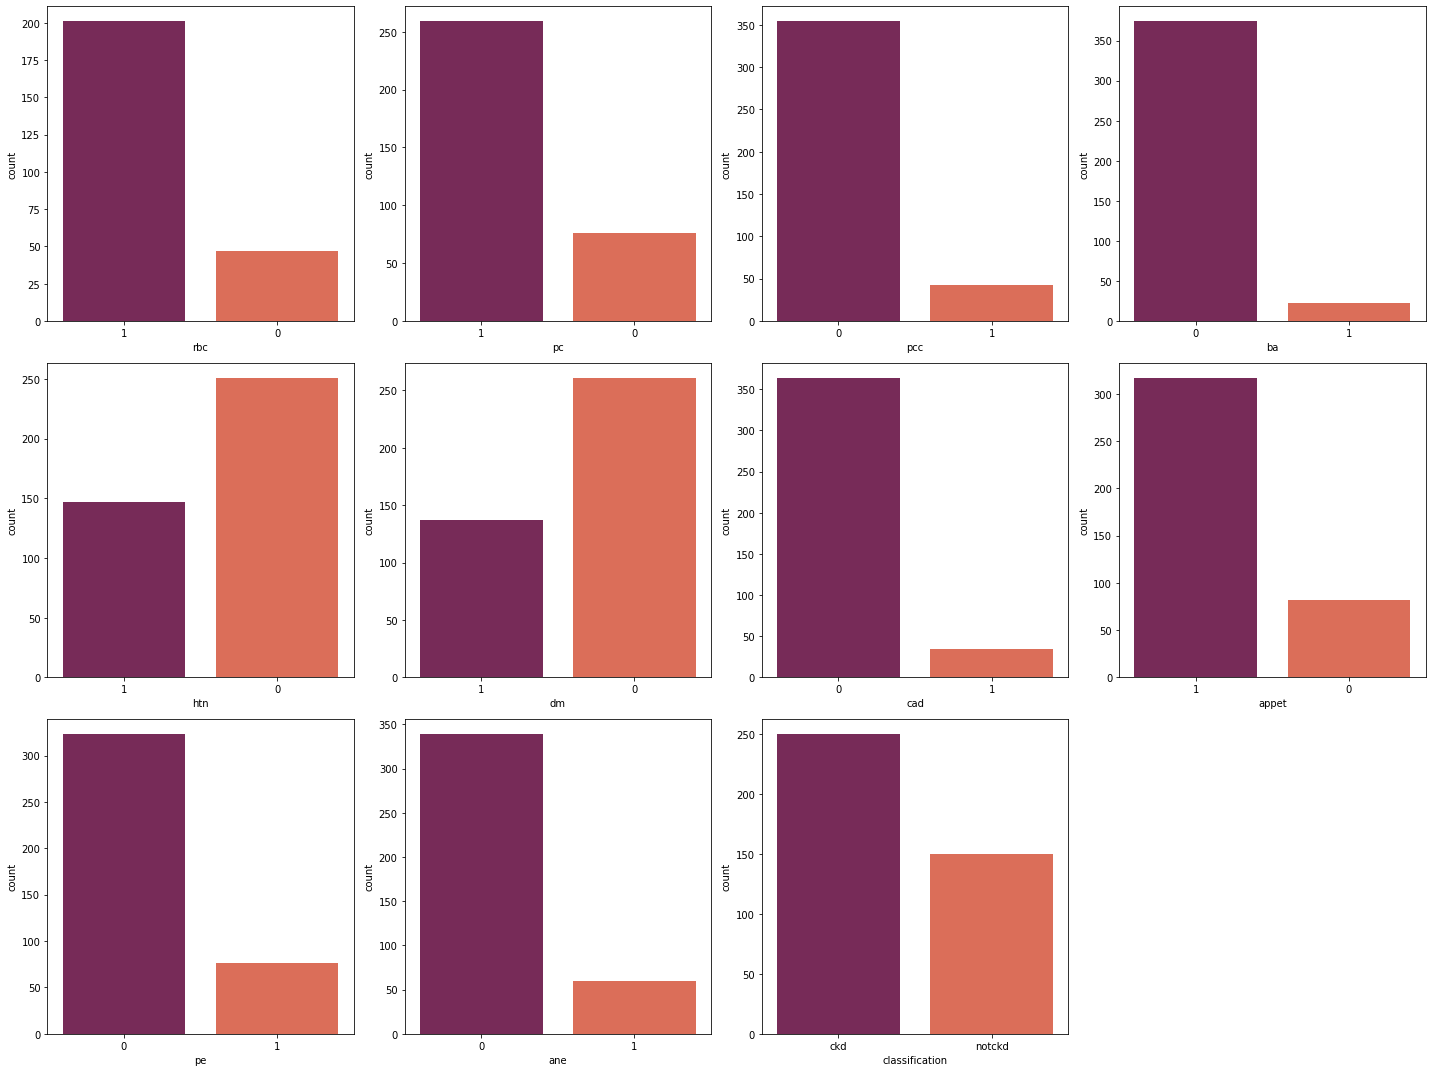

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidney_data[column], palette = 'rocket',hue_order='classification')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#DETECTING MISSING VAlUES

A few features have imbalanced categories. 

In [ ]:
((kidney_data.isnull().sum()/kidney_data.shape[0])*100).sort_values(ascending=False)

rbc               38.00
rc                32.75
wc                26.50
pot               22.00
sod               21.75
pcv               17.75
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [ ]:
kidney_data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
print('1012 missing val')

1012 missing val


In [ ]:
df2=kidney_data.dropna(axis=0)
df2.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Observation :

FOR categorical DATA!

red_blood_cells are having highest missing values : 38% (170 values) are missing.

pus_cell having 16.25% (50 values) missing

pus_cell_clumps and bacteria having 1% (4 values) missing

hypertension, diabetes_mellitus and coronary_artery_disease having 0.50 % (only 1 )value missing

FOR numerical DATA!

Red_blood_cell counts have the highest missing value 34% values are missing.

Packed_cell_volume has 18% and hemoglobin has 14% values missing.

⏰ for me ⏰


**There is no “perfect” way to fill in the missing data. It just all comes down to the requirement to try and do trials.**
```
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = kidney_data[feature].dropna().sample(kidney_data[feature].isna().sum())
    random_sample.index = kidney_data[kidney_data[feature].isnull()].index
    kidney_data.loc[kidney_data[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = kidney_data[feature].mode()[0]
    kidney_data[feature] = kidney_data[feature].fillna(mode)
  
  # filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('rc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)
  
  
  ```



⏰ for me ⏰
Here I will be using MICE (Multi-Variate Imputation by Chained Equations)
Simply put, MICE considers the feature with missing values as a dependent variable, and the remaining features as the predictors.

From these multiple fitted models, MICE picks up the best ones and imputes using them.

https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/
https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/


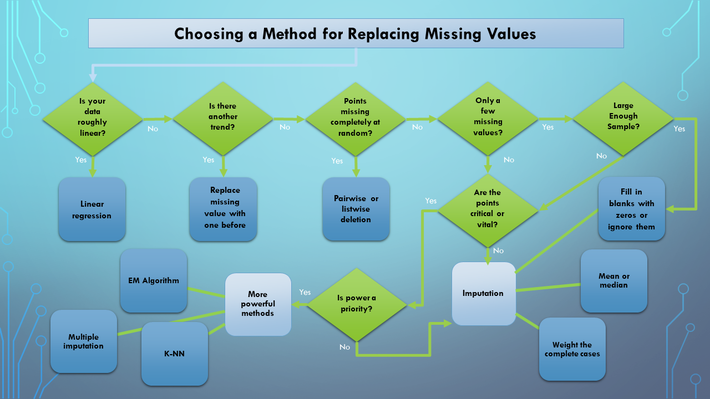


There is no “perfect” way to fill in the missing data. It just all comes down to the requirement to try and do trials.

In [ ]:
!pip install impyute

In [ ]:
X = kidney_data.drop('classification',axis=1)
X_train = X.loc[:400,]
X_test = X.loc[400:,]

NameError: ignored

again IT : **considers the feature with missing values as a dependent variable, and the remaining features as the predictors.**

In [ ]:
from impyute.imputation.cs import mice
# MICE requires float values
X_train_numerical = X_train.loc[:,num_cols].astype('float64')
# Passing the numpy arrays to mice
X_train_numerical_imputed = mice(X_train_numerical.values)

In [ ]:
X_train.loc[:,num_cols] = X_train_numerical_imputed
X_train.loc[:,num_cols].isna().sum().sort_values(ascending=False)

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [ ]:
pip install fancyimpute

     |████████████████████████████████| 154 kB 8.0 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=7ab330945069b011056614d2b794d22cde5f4fd5b1b6fb1a15c401f0035a08f8
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=d8fce782f2bd7d083af21ebfcd2fb11ed1a1924f0528f7ff06fcb97be45c5c11
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


**imputing categorical missing values**

https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/ 



In [ ]:
from fancyimpute import KNN

imputer = KNN()
X_train_imputed = pd.DataFrame(np.round(imputer.fit_transform(X_train)),columns = X_train.columns)
X_train_imputed.isnull().sum()


Imputing row 1/400 with 1 missing, elapsed time: 0.046
Imputing row 101/400 with 0 missing, elapsed time: 0.049
Imputing row 201/400 with 1 missing, elapsed time: 0.050
Imputing row 301/400 with 2 missing, elapsed time: 0.052


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_imputed)
X_train_scaled = scaler.transform(X_train_imputed)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = X_train.columns)
X_train_scaled.describe().T[['min', 'max']]
#Now, the data is on similar scales, and good enough to be modeled. The same steps shall also be applied on the test set.

,min,max
age,0.0,1.0
bp,0.0,1.0
sg,0.0,0.0
al,0.0,1.0
su,0.0,1.0
rbc,0.0,1.0
pc,0.0,1.0
pcc,0.0,1.0
ba,0.0,1.0
bgr,0.0,1.0




```
#same steps on Test Data 
# MICE requires float values
X_test_numerical = X_test.loc[:,num_cols].astype('float64')
X_test_numerical_imputed = mice(X_test_numerical.values)
X_test.loc[:,num_cols] = X_test_numerical_imputed
X_test_imputed = pd.DataFrame(np.round(imputer.fit_transform(X_test)),columns = X_test.columns)
scaler.fit(X_test_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns = X_test.columns)
X_test_scaled.describe().T[['min', 'max']]

```



In [ ]:
kidney_dataa=X_train_imputed

In [ ]:
kidney_dataaa=X_train_scaled 

Now, train and test data both are ready.

#Correlation


In [ ]:
kidney_dataa.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,400.00000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.52500,76.447500,1.0,1.102500,0.470000,0.810000,0.785000,0.105000,0.055000,149.317500,57.27000,3.037500,137.137500,4.532500,12.475000,38.242500,8510.170000,4.515000,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000
std,16.99401,13.494164,0.0,1.355207,1.100968,0.392792,0.411337,0.306937,0.228266,77.148925,49.62488,5.654736,10.060648,2.952242,2.810538,8.710245,2595.765374,0.988543,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.00000,50.000000,1.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,2.00000,-6.000000,4.000000,-3.000000,3.000000,9.000000,1772.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.00000,70.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100.750000,27.00000,1.000000,135.000000,4.000000,10.000000,32.000000,6900.000000,4.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,54.50000,80.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,123.000000,42.00000,1.000000,138.000000,4.000000,13.000000,39.000000,8507.500000,5.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
75%,64.00000,80.000000,1.0,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.500000,66.00000,3.000000,141.000000,5.000000,15.000000,44.000000,9644.250000,5.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000
max,90.00000,180.000000,1.0,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.00000,76.000000,163.000000,47.000000,18.000000,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


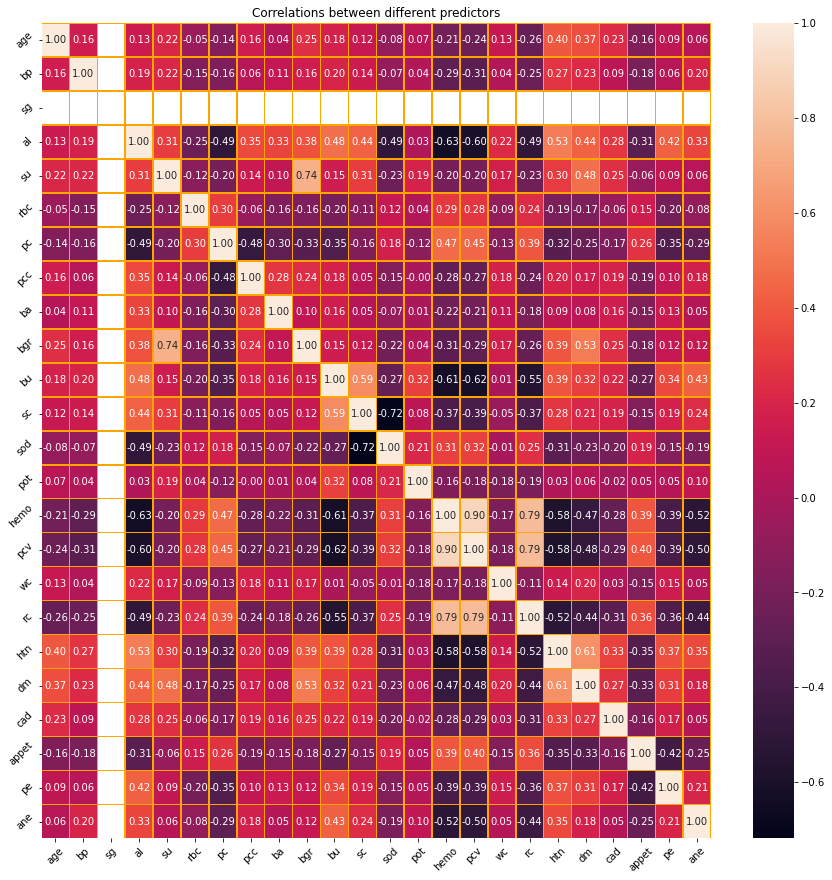

In [ ]:
corr_df =kidney_dataa.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

**Positive Correlation**

hemoglobin -> red_blood_cell_count,packed_cell_volume, specific_gravity

red_blood_cell_count -> packed_cell_volume,specific_gravity

specific_gravity -> packed_cell_volume

blood_glucose_random -> sugar

serum_creatinine -> blood_urea


**Negative correlation**

Albumin -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count

serum_creatinine -> sodium

blood_urea -> hemoglobin, packed_cell_volume,red_blood_cell_count



In [ ]:
from scipy import stats

In [ ]:
#test corr

pearson_coef, p_value = stats.pearsonr(kidney_dataa['pcv'], kidney_dataa['hemo'])
print("The Pearson Correlation Coefficient is {:.2f} with a P-value of P = {:.4}".format(pearson_coef, p_value))
 


The Pearson Correlation Coefficient is 0.90 with a P-value of P = 1.342e-148


In [ ]:
#test for me
pearson_coef, p_value = stats.pearsonr(kidney_dataa['al'], kidney_dataa['pcv'])
print("The Pearson Correlation Coefficient is {:.2f} with a P-value of P = {:.4}".format(pearson_coef, p_value))
 

The Pearson Correlation Coefficient is -0.60 with a P-value of P = 3.36e-40


In [ ]:
pd.pivot_table(kidney_data, index = 'classification', values = ['hemo','pcv'])


,hemo,pcv
classification,,
ckd,10.647549,32.939891
notckd,15.188194,46.335616


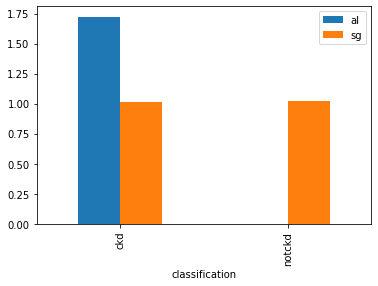

In [ ]:
pd.pivot_table(kidney_data, index = 'classification', values = ['sg','al']).plot(kind='bar')


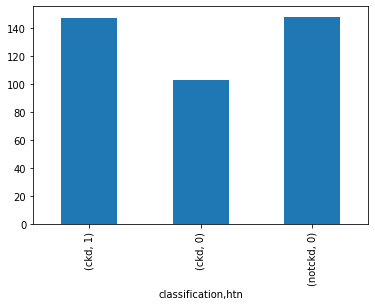

In [ ]:
kidney_data.groupby('classification')['htn'].value_counts().plot(kind='bar')

**yet there's more work to do here hinda...**

#work

In [ ]:
kidney_dataaa['classification'] = kidney_data.classification.replace(['ckd','notckd'], ['1','0'])
df2['classification'] = df2['classification'].replace(['ckd','notckd'], ['1','0'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
kidney_dataaa.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

 Apply logistic regression, and print the confusion matrix to validate your model. 

In [ ]:
kidney_dataaa=pd.concat([kidney_data.classification,kidney_dataa],axis=1)

In [ ]:
#on df2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x1 = df2[['sg','al','htn','hemo','pcv']]             

y1 = df2['classification']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=42)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x1_train, y1_train)  #fitting training data
y_pred  = logreg.predict(x1_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x1_test, y1_test)))
print('wow thats weird ', "Accuracy=100% ")

Accuracy=1.00
wow thats weird  Accuracy=100% 


In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = kidney_dataaa[['specific gravity','albumin','hypertension','hemoglobin','packed cell volume']]             

y = kidney_dataaa['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.97


In [ ]:
print(X.shape)
print(y.shape)

(400, 24)
(400,)


In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

by changing random state from 0 (accuracy = 0.96) to 42 accuracy = 0.98 wrong !
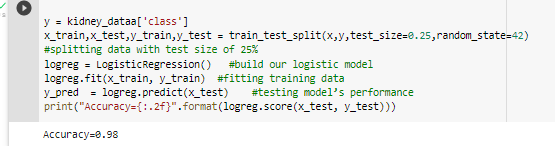

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.1,random_state=30) 
scores=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_validation)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_validation),2))
    scores.append(round(accuracy_score(y_pred,y_validation),2))

Accuracy for k= 1 is: 0.95
Accuracy for k= 2 is: 0.98
Accuracy for k= 3 is: 0.92
Accuracy for k= 4 is: 0.92
Accuracy for k= 5 is: 0.92
Accuracy for k= 6 is: 0.92
Accuracy for k= 7 is: 0.9
Accuracy for k= 8 is: 0.9
Accuracy for k= 9 is: 0.9
Accuracy for k= 10 is: 0.9
Accuracy for k= 11 is: 0.9
Accuracy for k= 12 is: 0.9
Accuracy for k= 13 is: 0.9
Accuracy for k= 14 is: 0.9


In [ ]:
np.argmax(scores)+1

2

optimal accuracy for k= 2 is: 0.95

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30) 

knn=KNeighborsClassifier(n_neighbors=2) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.94


why? Acuuracy= 0.94

Text(0, 0.5, 'Testing Accuracy')

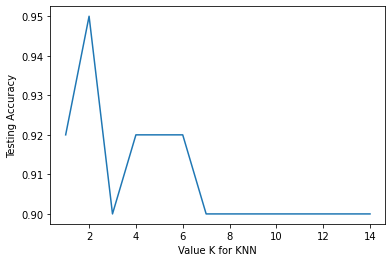

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

K=2 for optimal  accuracy of 0.95

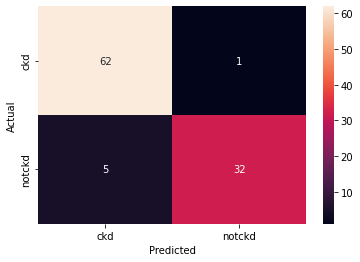

In [ ]:
import seaborn as sns
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred , rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Choosing the right value of K can be really tricky, one of the ways to make that process easier is running a ”for loop“and trying out different values of K. And then we choose the lowest one which has the highest accuracy.

for optima  accuracy of 0.95--> k=2
pay attention henda the more u increase the range of k the more your model begins to overfit : Overfitting occurs when a model tries to predict a trend in data that is too noisy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=15)

Dtree = tree.DecisionTreeClassifier(max_depth= 3,criterion='entropy',splitter='best',max_leaf_nodes=5)  
Dtree.fit(x_train, y_train)   
y_pred= Dtree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.975


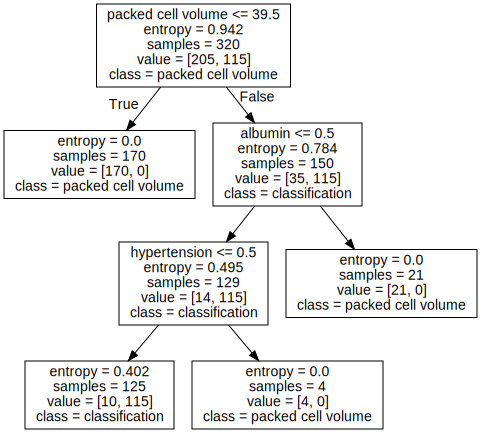

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot= export_graphviz(Dtree,
                      out_file=None,
                      feature_names = x.columns,
                      class_names= ['packed cell volume', 'classification'])
graph=graphviz.Source(dot)
graph.render('tree.png')
graph

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

In [ ]:
#Calculating the new accuracy 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


Part2: unsupervised learning

Drop out the target variable (named “classification”) ✈ 

Use hierarchical clustering to identify the inherent groupings within your data.

Plot the clusters. 

Plot the dendrogram. Use k-means clustering and select the optimal k.

Plot the clusters. 

In [ ]:
kidney_dataaa.drop('classification',axis=1, inplace=True,)


**Using hierarchical clustering to identify the inherent groupings within your data.**

In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='complete',distance_threshold=None) # by using for n_clusters in [0..12] exp case 
clust_labels=model.fit_predict(kidney_dataaa)  #Applying agglomerative algorithm with unknown value of clusters, using euclidean distance as a metric

agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


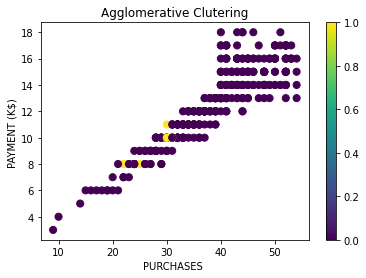

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kidney_dataaa['packed cell volume'] , kidney_dataaa['hemoglobin'], c = clust_labels, s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES ")
ax.set_ylabel("PAYMENT (K$) ")    
plt.colorbar(scatter)

#2 clustters

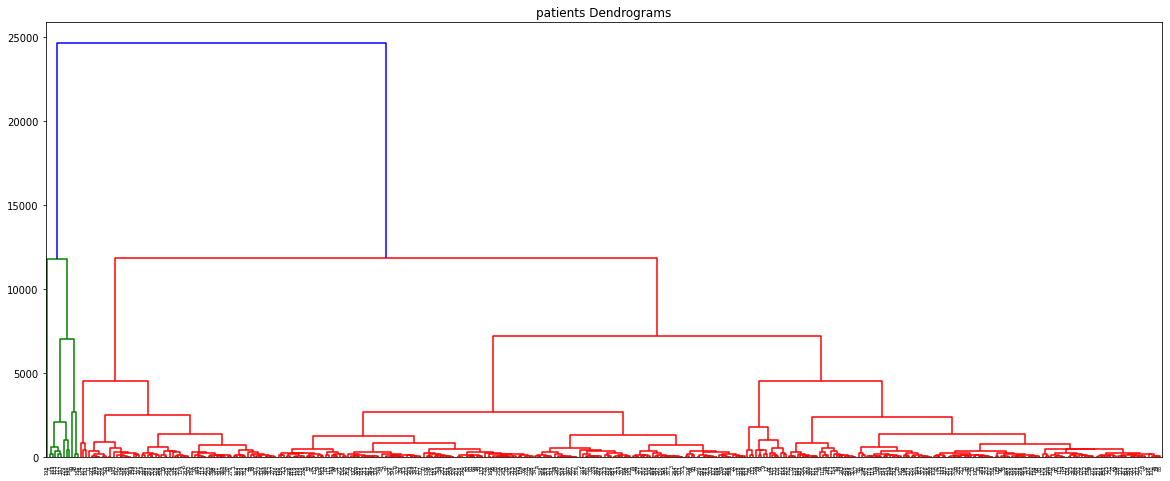

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,8))
plt.title("patients Dendrograms")
dend=shc.dendrogram(shc.linkage(kidney_dataaa, method="complete")) #2custers

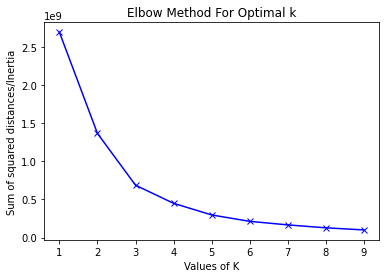

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10) 
for num_clusters in K :
 kmeans = KMeans(n_clusters = num_clusters , init = 'k-means++', random_state = 42)
 kmeans.fit(kidney_dataaa)
 Sum_of_squared_distances.append(kmeans.inertia_)

#plotting
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

#k between 3 and 4

 the best value of k is equal to 4.

In [ ]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(kidney_dataaa)
label=y_kmeans

In [ ]:
import matplotlib.pyplot as plt

#Getting the Centroids
centroids = kmeans.cluster_centers_
unique_labels = np.unique(y_kmeans)
 
#plotting the results:
 
for i in unique_labels:
    plt.scatter(kidney_dataa[label == i , 0] , kidney_dataa[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(kidney_dataa[label == i , 0] , kidney_dataa[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()


#please explain  the error


TypeError: ignored